# 可视化



In [3]:
#基本配置
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [7]:
x = np.linspace(0,10,50)
# plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
# plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
# plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
# plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
# plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
# plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

plt.plot 与 plt.scatter 除了特征上的差异之外，还有什么影响我们选择的因素呢？在数据量较小的时候，两者在效率上的差异不大。但是当数据变大到几千个散点时，plt.plot
的效率将大大高于 plt.scatter。这是由于 plt.scatter 会对每个散点进行单独的大小与颜色的渲染，因此渲染器会消耗更多的资源。而在 plt.plot 中，散点基本都彼此复制，因此
整个数据集中所有点的颜色、尺寸只需要配置一次。由于这两种方法在处理大型数据集时有很大的性能差异，因此面对大型数据集时，plt.plot 方法比 plt.scatter 方法好

$$sin(x)^{10} + cos(10+xy)*cos(x)$$

In [8]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

# 机器学习

![](https://scikit-learn.org/stable/_static/ml_map.png)

### 有监督学习
可以训练带标签的数据以预测新数据标签的模型。

#### 分类
可以预测两个或多个离散分类标签的模型。
#### 回归
可以预测连续标签的模型。

### 无监督学习
识别无标签数据结构的模型

Scikit-Learn 评估器 API 的常用步骤如下所示（后面介绍的示例都是按照这些步骤进行的）。

(1) 通过从 Scikit-Learn 中导入适当的评估器类，选择模型类。

(2) 用合适的数值对模型类进行实例化，配置模型超参数（hyperparameter）。

(3) 整理数据，通过前面介绍的方法获取特征矩阵和目标数组。

(4) 调用模型实例的 fit() 方法对数据进行拟合。

(5) 对新数据应用模型：

    • 在有监督学习模型中，通常使用 predict() 方法预测新数据的标签；
    • 在无监督学习模型中，通常使用 transform() 或 predict() 方法转换或推断数据的性质

In [25]:
import matplotlib.pyplot as plt
import numpy as np

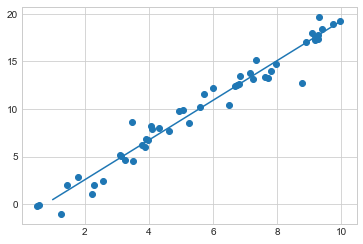

In [18]:
#线性回归

##生成模拟数据
rng = np.random.RandomState(50)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#开始线性拟合
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
X = x[:, np.newaxis]
model.fit(X,y)
nx=np.linspace(1,10,100)
ny=model.predict(nx[:,np.newaxis])
plt.plot(nx,ny)

In [50]:
#线性回归2 二维数据
from mpl_toolkits import mplot3d

##生成模拟数据
rng = np.random.RandomState(50)
x1 = 10 * rng.rand(50)
x2 = 10 * rng.rand(50)
y = 2 * x1 + 27*x2 - 1 + rng.randn(50)

x=np.append(x1[:,np.newaxis],x2[:,np.newaxis],axis=1)
print(x.shape)
#开始线性拟合
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x,y)
print(model.coef_)

(50, 2)
[ 1.99063903 27.08409666]


In [51]:
##高斯贝叶斯 分类
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

X_iris = iris.drop('species', axis=1)
X_iris.shape
y_iris = iris['species']
y_iris.shape

#划分测试集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

#准确率
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

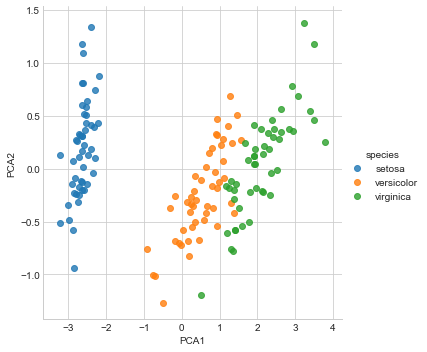

In [62]:
#数据降维
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);
#pca分析的时候，还不知道类别，但是结果已经很明确了

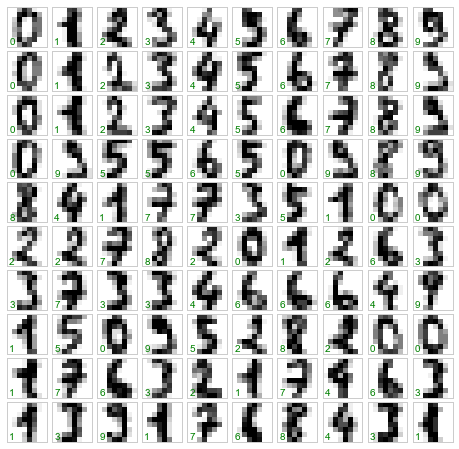

In [67]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [68]:
X = digits.data

In [69]:
y = digits.target
y.shape

(1797,)

In [70]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

In [72]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

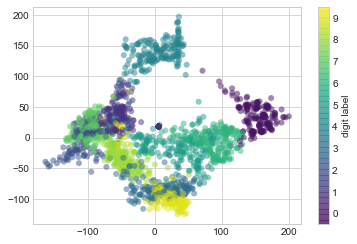

In [77]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap='viridis')
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [82]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

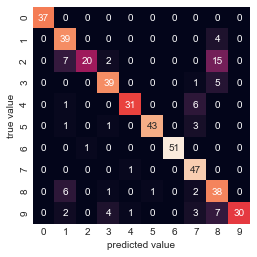

In [83]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

除了评估器的类型不同，导入模型 / 初始化模型 / 拟合数据 / 预测数据的步骤是完全相同的。对评估器 API 有了基本认识之后，你可以参考 Scikit-Learn 文档继续学习更多知识，并在你的数据上尝试不同的模型

1. 偏差与方差的均衡
“最优模型”的问题基本可以看成是找出偏差与方差平衡点的问题。 bias and variance.

对于高偏差模型，模型在验证集的表现与在训练集的表现类似。
对于高方差模型，模型在验证集的表现远远不如在训练集的表现。

![](https://i.loli.net/2019/04/17/5cb6c99a1eeb7.png)
训练得分肯定高于验证得分。一般情况下，模型拟合自己接触过的数据，比拟合没接触过的数据效果要好。
• 使用复杂度较低的模型（高偏差）时，训练数据往往欠拟合，说明模型对训练数据和新数据都缺乏预测能力。
• 而使用复杂度较高的模型（高方差）时，训练数据往往过拟合，说明模型对训练数据预测能力很强，但是对新数据的预测能力很差。
• 当使用复杂度适中的模型时，验证曲线得分最高。说明在该模型复杂度条件下，偏差与方差达到均衡状态。

通过观察验证曲线的变化趋势，可以发现有两个影响模型效果的因素：模型复杂度和训练数据集的规模。通常，我们将模型看成是与训练数据规模相关的函数，通过不断扩大数据集的规模来拟合模型，以此来观察模型的行为。反映训练集规模的训练得分 / 验证得分曲线被称为学习曲线（learning curve）。

学习曲线最重要的特征是，随着训练样本数量的增加，分数会收敛到定值。因此，一旦你的数据多到使模型得分已经收敛，那么增加更多的训练样本也无济于事！

In [87]:
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)
print(loo)
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

LeaveOneOut()
TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


## 特征工程 features engineering

one-hot encoding，独热编码

TF–IDF（term frequency–inverse document frequency，词频逆文档频率），[参考](https://zh.wikipedia.org/wiki/Tf-idf)


## 贝叶斯

由于朴素贝叶斯分类器对数据有严格的假设，因此它的训练效果通常比复杂模型的差。其优点主要体现在以下四个方面。

    • 训练和预测的速度非常快。
    • 直接使用概率预测。
    • 通常很容易解释。
    • 可调参数（如果有的话）非常少
    
朴素贝叶斯分类器非常适合用于以下应用场景。

    • 假设分布函数与数据匹配（实际中很少见）。
    • 各种类型的区分度很高，模型复杂度不重要。
    • 非常高维度的数据，模型复杂度不重要。

## 线性回归

朴素贝叶斯（详情请参见 5.5 节）是解决分类任务的好起点，那么线性回归模型就是解决回归任务的好起点。

虽然这种方法还是有局限性，因为它将变量限制在了线性关系上，但是不用担心，还有其他方法。

## 支持向量机

